In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder   # import label encoder
import joblib

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
train_edit=train.copy()
train_edit['Gender'].fillna(train_edit.Gender.mode()[0],inplace=True)
train_edit['Married'].fillna(train_edit.Married.mode()[0],inplace=True)
train_edit['Dependents'].fillna(train_edit.Dependents.mode()[0],inplace=True)
train_edit['Self_Employed'].fillna(train_edit.Self_Employed.mode()[0],inplace=True)
train_edit['LoanAmount'].fillna(train_edit['LoanAmount'].mean().round(1),inplace=True)
train_edit['Loan_Amount_Term'].fillna(train_edit['Loan_Amount_Term'].mean().round(1),inplace=True)
train_edit['Credit_History'].fillna(train_edit['Credit_History'].mean().round(1),inplace=True)

In [7]:
train_edit.isna().sum()
#train_edit['LoanAmount'].mean().round(1)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
train_edit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_edit['Loan_Status_id']=train_edit['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)

In [10]:
train_edit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_id
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [11]:

labelencoder = LabelEncoder()
encode_vars=['Gender','Married','Education','Self_Employed','Property_Area']
for i in encode_vars:
    train_edit[i]=labelencoder.fit_transform(train_edit[i])
    

In [12]:
train_edit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_id
0,LP001002,1,0,0,0,0,5849,0.0,146.4,360.0,1.0,2,Y,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,1


In [13]:
#sns.pairplot(train_edit,hue='Loan_Status')
#plt.show()

In [14]:
train_edit['id']=train_edit['Loan_Status_id'].astype('category')
print(train_edit.head())
print(train.head())

    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       146.4             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  Loan_Status_id id  
0             1.0              2           Y               1  1  
1             1.0         

In [15]:
train_edit.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents             object
Education               int32
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
Loan_Status            object
Loan_Status_id          int64
id                   category
dtype: object

In [16]:
train_edit.groupby('Loan_Status_id').aggregate(['mean','median'])

Gender          Married        Education         \
                    mean median      mean median      mean median   
Loan_Status_id                                                      
0               0.807292      1  0.588542      1  0.270833      0   
1               0.822275      1  0.682464      1  0.194313      0   

               Self_Employed        ApplicantIncome         CoapplicantIncome  \
                        mean median            mean  median              mean   
Loan_Status_id                                                                  
0                   0.135417      0     5446.078125  3833.5       1877.807292   
1                   0.132701      0     5384.068720  3812.5       1504.516398   

                        LoanAmount        Loan_Amount_Term         \
                median        mean median             mean median   
Loan_Status_id                                                      
0                268.0  150.944792  133.5       344.000000  360.0   
1               1239.5  144.349289  128.0       341.090047  360.0   

               Credit_History        Property_Area         
                         mean median          mean median  
Loan_Status_id                                             
0                    0.559375    1.0      1.000000      1  
1                    0.965877    1.0      1.054502      1

In [17]:
features=[col for col in train_edit.columns if col!='Loan_Status']
features=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

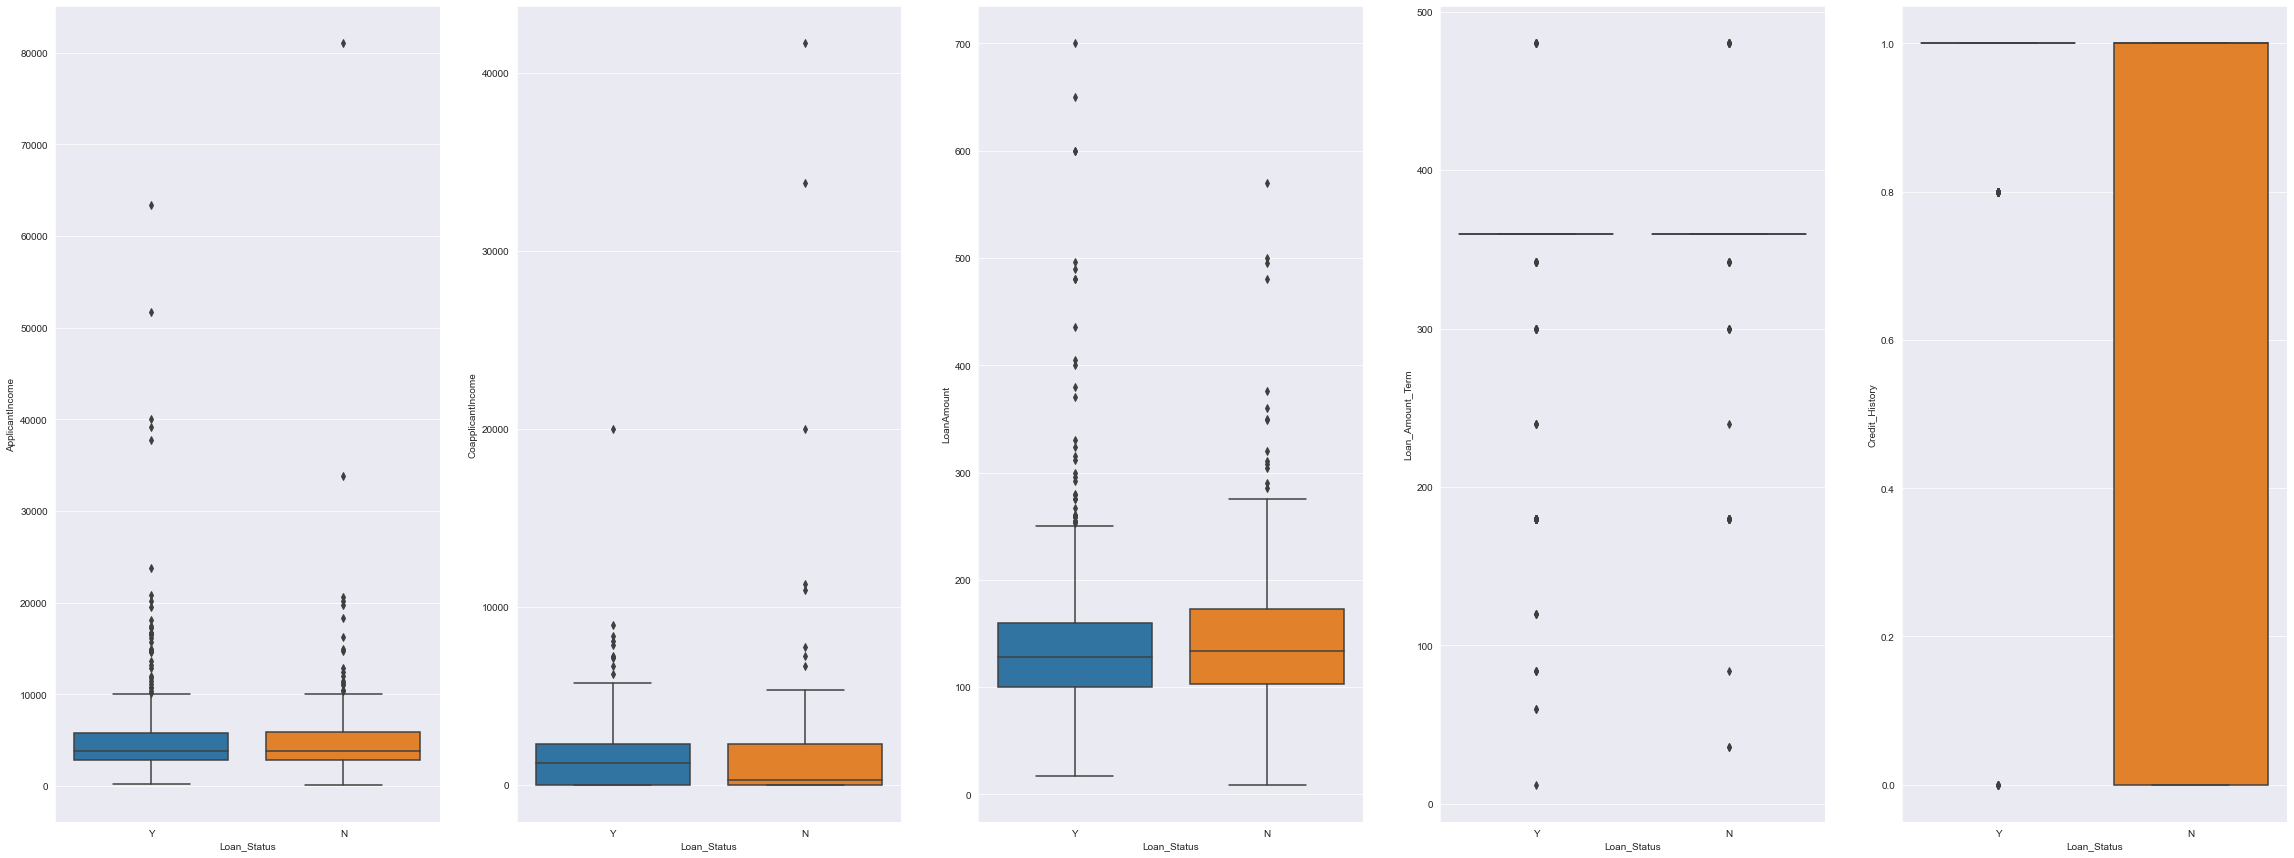

In [18]:
# Create boxplots to understand differences in distributions among people with and without diabetes
fig, axs = plt.subplots(ncols = len(features), figsize = (40, 15))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Loan_Status', 
                y = field, 
                data = train_edit,
                ax = axs[idx])

<AxesSubplot:>

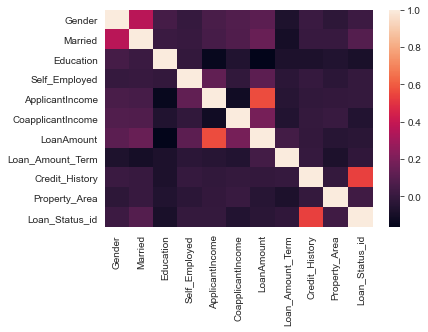

In [19]:
sns.heatmap(train_edit.corr())

In [20]:
features=train_edit.columns

In [21]:
x = train_edit[features[:-3]]
y = train_edit['Loan_Status_id']

print(x)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001002       1        0          0          0              0   
1    LP001003       1        1          1          0              0   
2    LP001005       1        1          0          0              1   
3    LP001006       1        1          0          1              0   
4    LP001008       1        0          0          0              0   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          0              0   
610  LP002979       1        1         3+          0              0   
611  LP002983       1        1          1          0              0   
612  LP002984       1        1          2          0              0   
613  LP002990       0        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       146.4             360.0   
1

In [22]:
train_edit['Dependents']=train_edit['Dependents'].apply(lambda x: x if x.isnumeric() else 3 )
train_edit['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [23]:
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  filename = 'finalized_model.sav'
  joblib.dump(model, filename)
#Perform k-fold cross-validation with 5 folds
  kf = KFold( n_splits=5)#data.shape[0]
  loss = []
  for train, test in kf.split(data): 
    # train and test will have ids of split
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    loss.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(loss)))

 


In [24]:
outcome_var = 'Loan_Status_id'
model = LogisticRegression(random_state=10)
predictor_var = ['Credit_History','Education','Married','Property_Area']
trained_model=classification_model(model, train_edit,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [25]:
train_edit['LoanAmount_log']=np.log(train_edit['LoanAmount'])
train_edit['TotalIncome']=train_edit['ApplicantIncome']+train_edit['CoapplicantIncome']
train_edit['TotalIncome_log']=np.log(train_edit['TotalIncome'])

In [26]:
outcome_var = 'Loan_Status_id'
model = LogisticRegression(random_state=0)
predictor_var = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_edit,predictor_var,outcome_var)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [27]:
#######Random Forest############################
outcome_var = 'Loan_Status_id'
model = RandomForestClassifier(n_estimators=100,min_samples_leaf=4)
#predictor_var = ['Credit_History','Married','LoanAmount','TotalIncome']
predictor_var = ['Gender', 'Married','Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log'] #,'TotalIncome_log'
classification_model(model, train_edit,predictor_var,outcome_var)

Accuracy : 81.759%
Cross-Validation Score : 80.948%


In [28]:
def preprocess(data):
    print(len(data))
    data_edit=data.copy()
    
    #data_edit['Loan_Status_id']=data_edit['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
    data_edit['Gender'].fillna(data_edit.Gender.mode()[0],inplace=True)
    data_edit['Married'].fillna(data_edit.Married.mode()[0],inplace=True)
    data_edit['Dependents'].fillna(data_edit.Dependents.mode()[0],inplace=True)
    data_edit['Self_Employed'].fillna(data_edit.Self_Employed.mode()[0],inplace=True)
    data_edit['LoanAmount'].fillna(data_edit['LoanAmount'].mean().round(1),inplace=True)
    data_edit['Loan_Amount_Term'].fillna(data_edit['Loan_Amount_Term'].mean().round(1),inplace=True)
    data_edit['Credit_History'].fillna(data_edit['Credit_History'].mean().round(1),inplace=True)
    labelencoder = LabelEncoder()
    encode_vars=['Gender','Married','Education','Self_Employed','Property_Area']
    for i in encode_vars:
        #print(i)
        data_edit[i]=labelencoder.fit_transform(data_edit[i])
    data_edit['Dependents']=data_edit['Dependents'].apply(lambda x: x if x.isnumeric() else 3 )
    data_edit['LoanAmount_log']=np.log(data_edit['LoanAmount'])
    data_edit['TotalIncome']=data_edit['ApplicantIncome']+data_edit['CoapplicantIncome']
    data_edit['TotalIncome_log']=np.log(data_edit['TotalIncome'])
    return data_edit

In [29]:
test=pd.read_csv('test.csv')
print(test.columns,test.head(3))
test_edit=preprocess(test)

#Make predictions on training set:
predictions = model.predict(test_edit[predictor_var])
print(predictor_var)
print(len(test_edit))
test_edit.columns
predictions_labeled=['Y' if i==1 else 'N' for i in predictions  ]
print(len(predictions_labeled))
results={'Loan_ID':test_edit['Loan_ID'] ,'Loan_Status':predictions_labeled }
df=pd.DataFrame(results)
df.set_index('Loan_ID',inplace=True)
df.head()
df.to_csv('test_results.csv')
x=pd.read_csv('test_results.csv',index_col='Loan_ID')
#x.drop('Unnamed: 0',axis=1)
x.head()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')     Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   
2  LP001031   Male     Yes          2  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
367
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term',

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [30]:
test=pd.read_csv('test.csv')
test_edit=preprocess(test)
#Make predictions on training set:
predictions = model.predict(test_edit[predictor_var])
print(predictor_var)
print(len(test_edit))
test_edit.columns
predictions_labeled=['Y' if i==1 else 'N' for i in predictions  ]
print(len(predictions_labeled))
results={'Loan_ID':test_edit['Loan_ID'] ,'Loan_Status':predictions_labeled }
df=pd.DataFrame(results)
df.set_index('Loan_ID',inplace=True)
df.head()
df.to_csv('test_results.csv')
x=pd.read_csv('test_results.csv',index_col='Loan_ID')
#x.drop('Unnamed: 0',axis=1)
x.head()

367
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log']
367
367


,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


- Logistic regression: 78.47
- Logistic regression['Credit_History', 'Education', 'Married', 'Property_Area']: 77.77
- Random Forest['Credit_History', 'Education', 'Married', 'Property_Area']: 77.08
- 

- model = RandomForestClassifier(n_estimators=100,min_samples_leaf=4): 77.77
  #predictor_var = ['Credit_History','Married','LoanAmount','TotalIncome']
  predictor_var = ['Gender', 'Married','Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log']